#### ***Shibu Mohapatra*** 
#### ***DATA SCIENCE***

### **Principal Component Analysis**

**THEORY:** 
- PCA stands for Principal Component Analysis which is dimensionality reduction method which is used to reduce the dimension of large data set.

- In PCA we transform a large data set of variables into small parts which still contains most of information of a large set.

- Algorithm / Code Explaination - 
  1. Get the data
  2. Standardize your data
  3. Get Covariance of Z
  4. Calculate Eigen Vectors and Eigen Values
  5. Sort the Eigen Vectors
  6. Calculate the new features
  7. Drop unimportant features from the new set
  8. The first two principal components contain 95.80% of the information. 
  9. The first principal component contains 72.77% of the variance. The second principal component contains 23.03% of the variance. 
  10. The third and fourth principal component contained the rest of the variance of the dataset.


**CODE:**

In [ ]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [ ]:
# load dataset into PD DataFrame

csv_file = '/content/iris.data'
df = pd.read_csv(csv_file, names=['sepal length','sepal width','petal length','petal width','target'])

In [ ]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values

In [ ]:
y = df.loc[:,['target']].values

In [ ]:
x=StandardScaler().fit_transform(x)

In [ ]:
x[0]

# array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00],...  

array([-0.90068117,  1.03205722, -1.3412724 , -1.31297673])

In [ ]:
pd.DataFrame(data=x,columns=features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [ ]:
# PCA projection into 2D

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDF=pd.DataFrame(data=principalComponents,columns=['PCfeature1','PCfeature2'])

In [ ]:
principalDF.head()

,PCfeature1,PCfeature2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [ ]:
finalDF=pd.concat([principalDF,df['target']],axis=1)
finalDF.head()

,PCfeature1,PCfeature2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


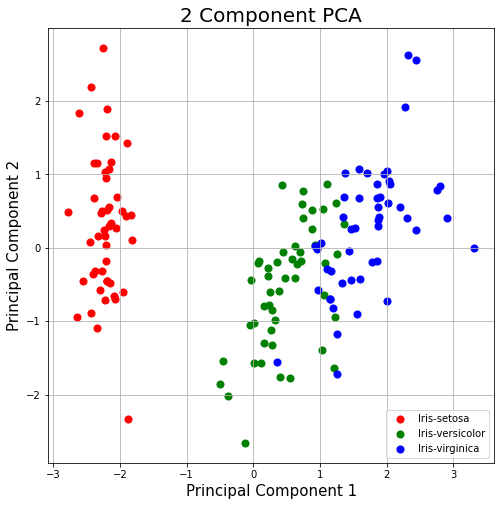

In [ ]:
# Visualize 2D projection

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['target'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'PCfeature1']
               , finalDF.loc[indicesToKeep, 'PCfeature2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
# Variance - Variance can be attributed to each of the principal components
pca.explained_variance_ratio_

# 95, 5% loss

array([0.72770452, 0.23030523])

### **K MEANS CLUSTERING**

**THEORY:**
- The K means clustering is based on unsupervised learning where we have an unlabeled data.

- The agenda here is to find group in data, with the number of groups represented by the variable K.

- A cluster refers to a collection of data points aggregated together because of certain similarities.

- A centroid is the imaginary or real location representing the center of the cluster.

- Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.

  1. Partitioning 
  2. Hierarchical 

- Algorithm / Code Explaination:

  1. K means - Number of groups you want to divide into, 6
  2. Initialize 6 centroids randomly
  3. Loop starts, repeat the following steps until [Either centroid do not shift or Number of iterations are exhausted]

  4. Assign each point to closest centroid.
  5. Calculate new centroid.

**CODE:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
csv_file = '/content/train_and_test2.csv'
df_titanic = pd.read_csv(csv_file)

In [ ]:
df_titanic.head(3)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1


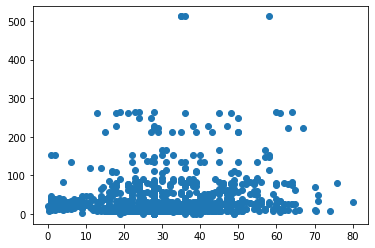

In [ ]:
y = df_titanic['Fare']
x = df_titanic['Age']
plt.scatter(x,y)

In [ ]:
kmeanscluster_model = KMeans(n_clusters=6,max_iter=1000)

In [ ]:
kmeanscluster_model.fit(df_titanic[['Age','Fare']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
color_dictionary = {0: 'red', 1: 'blue', 2: 'green' , 3: 'yellow',4: 'pink', 5: 'black', 6: 'orange'}
label_list = kmeanscluster_model.labels_.tolist()
df_titanic['color'] = label_list

for i in color_dictionary:
  df_titanic['color'] = df_titanic['color'].replace(i,color_dictionary[i])

In [ ]:
kmeanscluster_model.cluster_centers_

array([[ 45.39111111,  20.36766622],
       [ 36.51470588, 237.78762353],
       [ 34.50862069,  66.60048046],
       [ 41.        , 512.3292    ],
       [ 23.55417676,  13.46936453],
       [ 33.49826087, 133.34655435]])

In [ ]:
center_centroid = kmeanscluster_model.cluster_centers_

In [ ]:
center_centroid[0]

array([45.39111111, 20.36766622])

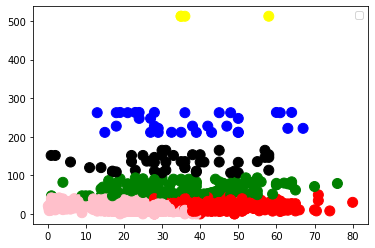

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x, y,c = df_titanic['color'],  s = 100)
ax.legend()
plt.show()

In [ ]:
average_fare_per_age = (df_titanic['Fare'].mean()/df_titanic['Age'].mean())
average_fare_per_age

1.1280505788889457

In [ ]:
for color in color_dictionary:
  print("Average age of group " + str(color+1) + " and color " + str(color_dictionary[color]) + " is as following" )
  df_group = df_titanic[df_titanic['color']==color_dictionary[color]]
  average_group_fare_per_age = df_group['Fare'].mean()/df_group['Age'].mean()
  
  if average_group_fare_per_age >= average_fare_per_age:
    print("This group is above average")
  else:
    print("This group is below average")

Average age of group 1 and color red is as following
This group is below average
Average age of group 2 and color blue is as following
This group is above average
Average age of group 3 and color green is as following
This group is above average
Average age of group 4 and color yellow is as following
This group is above average
Average age of group 5 and color pink is as following
This group is below average
Average age of group 6 and color black is as following
This group is above average
Average age of group 7 and color orange is as following
This group is below average


In [ ]:
for color in color_dictionary:
  print("Average age of group " + str(color+1) + " is as following" )
  df_group = df_titanic[df_titanic['color']==color_dictionary[color]]
  print(df_group['Fare'].mean()/df_group['Age'].mean())

Average age of group 1 is as following
0.44871486340938016
Average age of group 2 is as following
6.51210567861458
Average age of group 3 is as following
1.9299664584894645
Average age of group 4 is as following
12.495834146341464
Average age of group 5 is as following
0.5718461174716981
Average age of group 6 is as following
3.980700815097473
Average age of group 7 is as following
nan


### **Time Seris Forecasting**

**THEORY:**
- It is used for analyzing time series data in order to extract meaningful statistics and other characteristics of the data.

- Time series model is often used to predict future values based on previous observed values. Time Series Analysis is a sequence of observersation in a time series. 

- The Components are,
  1. Trend - Based on long term movement, end to end whether its going up and down.
  2. Seasonality - Based on short term, ek particular time pe hee.
  3. Cyclicity - Based on short term, where it sharted it will add at that point.
  4. Irregularity - Dumbness, Random movements.

- Algorithm / Code Explaination:
  1. Prophet Library
  2. Get the data 
  3. Drop null values
  4. Defining Seasonality & predict Future
  5. Plotting
  6. Comaparing 2 different stocks.


**CODE:**

In [ ]:
from fbprophet import Prophet
import pandas as pd

In [ ]:
input_path = '/content/'
Amazon = 'AMZN.csv'
Apple =  'AAPL.csv'

df_amazon = pd.read_csv(input_path + Amazon)
df_apple = pd.read_csv(input_path + Apple)

df_new_amazon = df_amazon[['Date', 'Adj Close']]
df_new_apple = df_apple[['Date', 'Adj Close']]

all_df = [df_new_amazon, df_new_apple]

In [ ]:
df_amazon.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-28,1770.000000,1777.930054,1753.469971,1773.420044,1773.420044,3043000
1,2019-03-29,1786.579956,1792.859985,1776.630005,1780.750000,1780.750000,3320800
2,2019-04-01,1800.109985,1815.670044,1798.729980,1814.189941,1814.189941,4238800


In [ ]:
df_apple.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-28,47.237499,47.389999,46.882500,47.180000,46.212219,83121600
1,2019-03-29,47.457500,47.520000,47.134998,47.487499,46.513416,94256000
2,2019-04-01,47.910000,47.919998,47.095001,47.810001,46.829304,111448000


In [ ]:
df_new_amazon.dropna().drop_duplicates()

,Date,Adj Close
0,2019-03-28,1773.420044
1,2019-03-29,1780.750000
2,2019-04-01,1814.189941
3,2019-04-02,1813.979980
4,2019-04-03,1820.699951
...,...,...
499,2021-03-22,3110.870117
500,2021-03-23,3137.500000
501,2021-03-24,3087.070068
502,2021-03-25,3046.260010


In [ ]:
df_new_apple.dropna().drop_duplicates()

,Date,Adj Close
0,2019-03-28,46.212219
1,2019-03-29,46.513416
2,2019-04-01,46.829304
3,2019-04-02,47.510036
4,2019-04-03,47.835732
...,...,...
499,2021-03-22,123.389999
500,2021-03-23,122.540001
501,2021-03-24,120.089996
502,2021-03-25,120.589996


**AMAZON**

In [ ]:
df_new_amazon.columns = ['ds','y']

In [ ]:
amzn = Prophet(daily_seasonality=True)
amzn.fit(df_new_amazon)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future = amzn.make_future_dataframe(periods=365)
print(future.to_string)

<bound method DataFrame.to_string of             ds
0   2019-03-28
1   2019-03-29
2   2019-04-01
3   2019-04-02
4   2019-04-03
..         ...
864 2022-03-22
865 2022-03-23
866 2022-03-24
867 2022-03-25
868 2022-03-26

[869 rows x 1 columns]>


In [ ]:
forecast = amzn.predict(future)

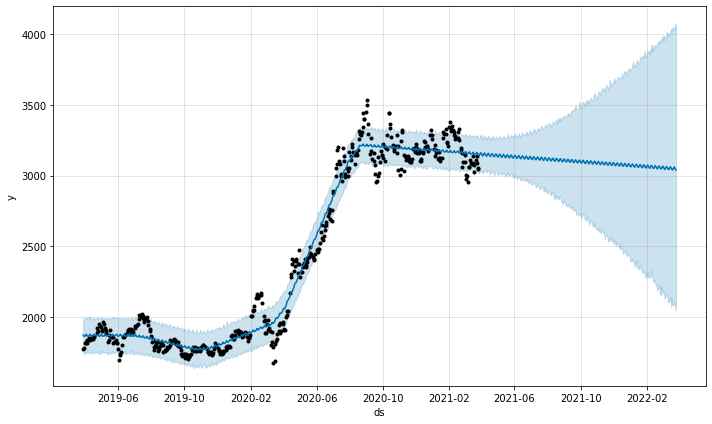

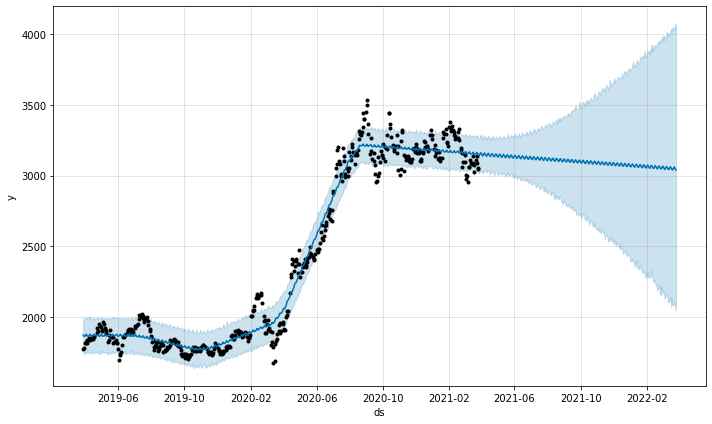

In [ ]:
amzn.plot(forecast)

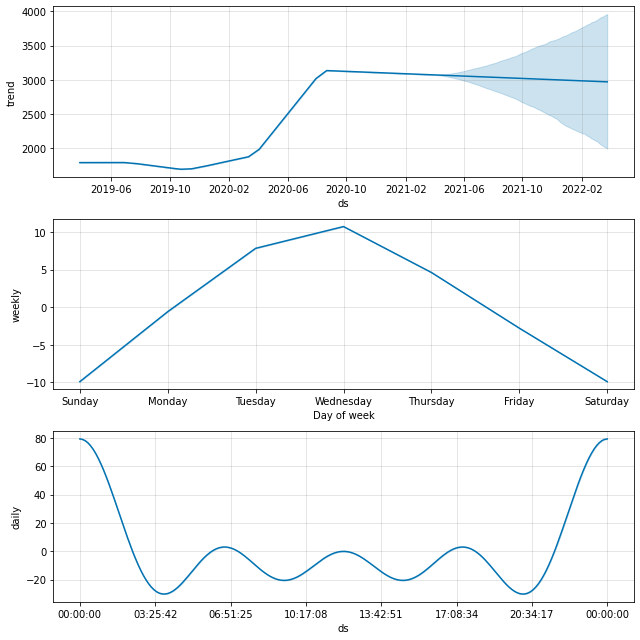

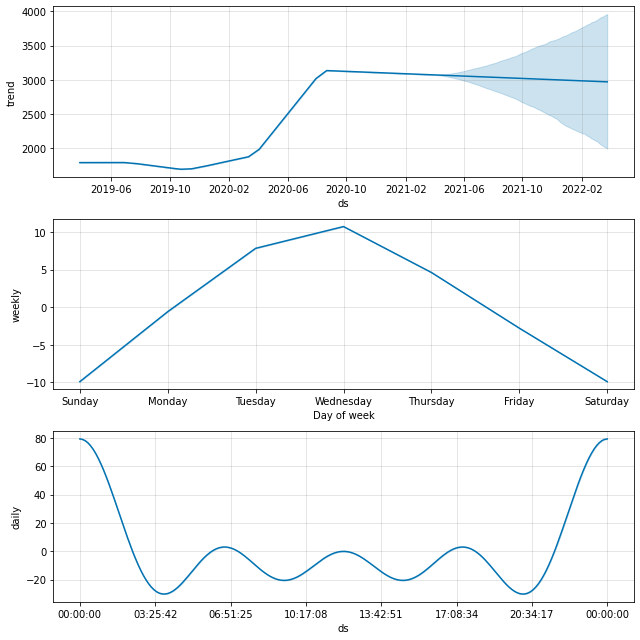

In [ ]:
amzn.plot_components(forecast)

**APPLE**

In [ ]:
df_new_apple.columns = ['ds','y']

In [ ]:
aapl = Prophet(daily_seasonality=True)
aapl.fit(df_new_amazon)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future = aapl.make_future_dataframe(periods=365)
print(future.to_string)

<bound method DataFrame.to_string of             ds
0   2019-03-28
1   2019-03-29
2   2019-04-01
3   2019-04-02
4   2019-04-03
..         ...
864 2022-03-22
865 2022-03-23
866 2022-03-24
867 2022-03-25
868 2022-03-26

[869 rows x 1 columns]>


In [ ]:
forecast = aapl.predict(future)

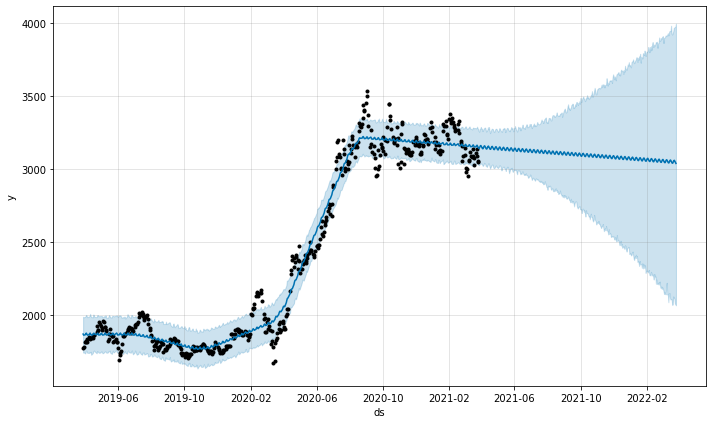

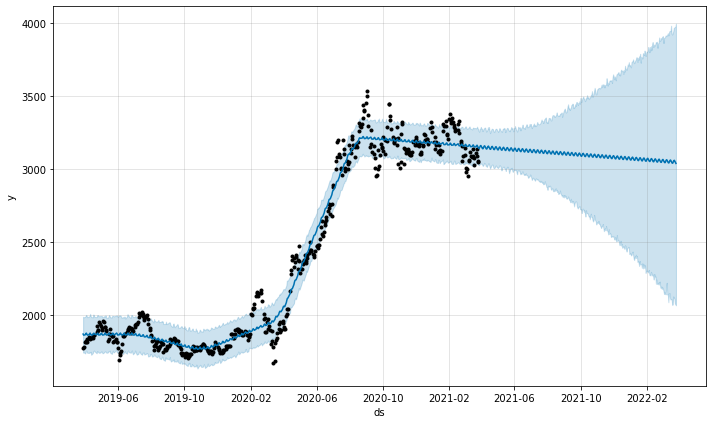

In [ ]:
aapl.plot(forecast)

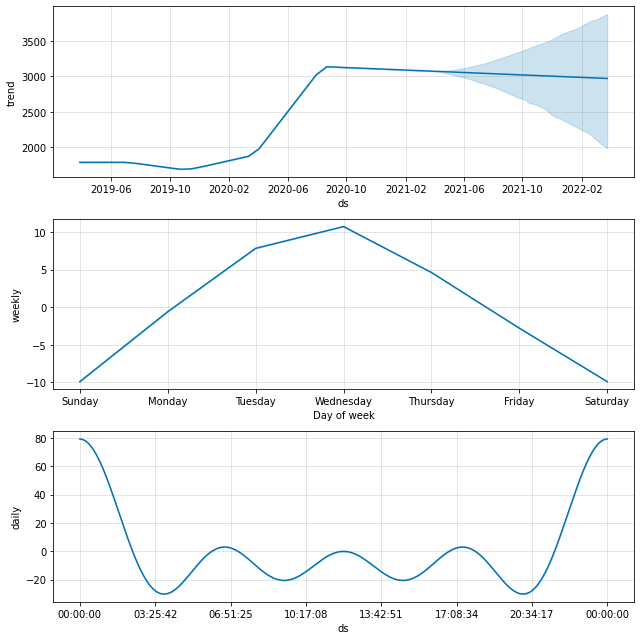

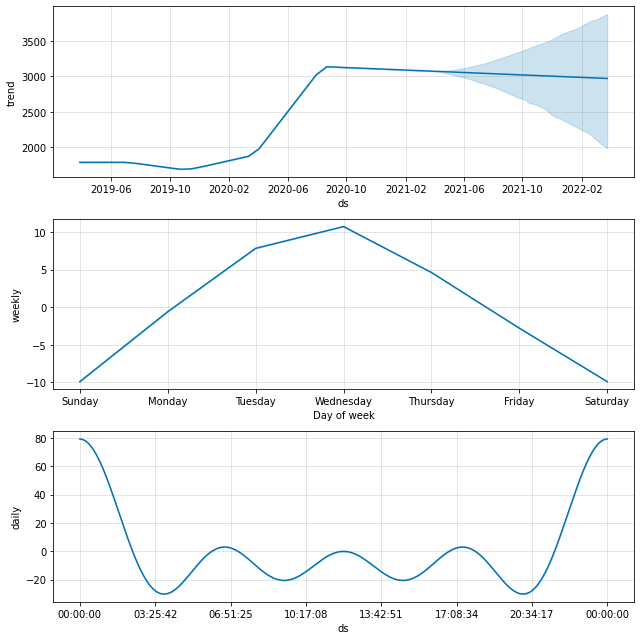

In [ ]:
aapl.plot_components(forecast)

In [ ]:
all_stocks = ['Amazon','Apple']

# 180 = 6 months, 548 = 1.5 years, 1825 = 5 years

time_periods = [180,548,1825]
profit_percentage = []

In [ ]:
for i in all_df:
  i.rename(columns = {'Date':'ds', 'Adj Close':'y'}, inplace = True)
  i = i.dropna().drop_duplicates()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
for i in all_df:
  temp_results = []

  for time in time_periods:
    s = Prophet()
    s.fit(i) 
    future = s.make_future_dataframe(periods=time)
    last_frame = len(future) - 1
    forecast = s.predict(future)
    current_price = forecast['yhat'].iloc[249]
    last_result = forecast['yhat'].iloc[last_frame]
    percentage_profit = int(((last_result - current_price)/ current_price) * 100)
    temp_results.append(percentage_profit)  
  profit_percentage.append(temp_results)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [ ]:
profit_percentage

[[54, 45, 32], [115, 159, 318]]

### **Simple/Multiple Linear Regression**

**THEORY:**
- It uses the least square method.
- Draw a line through all the plotted data points. The line is positioned in a way that it minimizes the distance to all of the data points.
- The distance is called "residuals" or "errors".
- Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. 
- One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable
- numpy.shape, numpy.reshape, LINE, Predict, reg.score()

- Algorithm / Code Explaination:
  1. Importing Linear reg libraries
  2. Get the data
  3. Print the array and reshape it
  4. Defining regression
  5. Predicting Reg & Reg score
  6. Plotting the Linear Regression line.
  7. Also plotting a 3D Graph where more than one variable is used.
  8. Here, we've taken AGE, TRESTBPS, CHOL, THALACH

**CODE:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
input_path = '/content/'
csv_file = 'heart.csv'
final_file = input_path + csv_file

df_heart = pd.read_csv(csv_file)

In [ ]:
df_heart.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [ ]:
X = np.array(df_heart['chol'])
print(X.shape)

X = X.reshape(-1,1)

(303,)


In [ ]:
print(X.shape)
print(X[1])

(303, 1)
[250]


In [ ]:
Y = np.array(df_heart['thalach'])
print(Y[1])

187


In [ ]:
print(Y.shape)

(303,)


In [ ]:
Y.reshape(303)

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 162, 158, 172, 114, 171, 151, 161, 179, 178, 137, 178, 162,
       157, 123, 157, 152, 168, 140, 188, 152, 125, 160, 170, 165, 148,
       151, 142, 180, 148, 143, 182, 172, 180, 156, 115, 160, 149, 151,
       146, 175, 172, 158, 186, 185, 174, 159, 130, 156, 190, 132, 165,
       182, 143, 175, 170, 163, 147, 154, 202, 186, 165, 161, 166, 164,
       184, 154, 179, 170, 160, 178, 122, 160, 151, 156, 158, 122, 175,
       168, 169, 159, 138, 111, 157, 147, 162, 173, 178, 145, 179, 194,
       163, 115, 131, 152, 162, 159, 154, 173, 133, 161, 155, 170, 168,
       162, 172, 152, 122, 182, 172, 167, 179, 192, 143, 172, 169, 121,
       163, 162, 162, 153, 163, 163,  96, 140, 126, 105, 157, 181, 173,
       142, 116, 143, 149, 171, 169, 150, 138, 125, 155, 152, 152, 131,
       179, 174, 144, 163, 169, 166, 182, 173, 173, 108, 129, 160, 147,
       155, 142, 168, 160, 173, 132, 114, 160, 158, 120, 112, 13

In [ ]:
heart_reg = LinearRegression().fit(X, Y)

In [ ]:
heart_reg.predict(np.array([[123]]))

array([150.18831865])

In [ ]:
heart_reg.score(X, Y)

9.88003922428593e-05

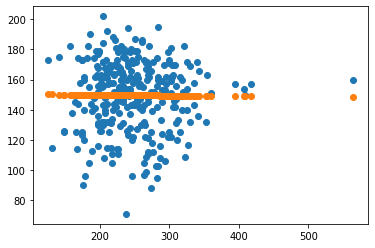

In [ ]:
plt.scatter(df_heart['chol'], df_heart['thalach'])
Z = heart_reg.predict(X)
plt.scatter(df_heart['chol'], Z)

0.05002948638555005


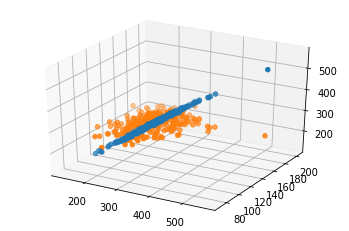

In [ ]:
# When More than one variables involved here

X1 = np.array(df_heart[['age','trestbps']])
Y1 = np.array([df_heart['chol']])
Y1= Y1.reshape(303,1)

heart_reg = LinearRegression().fit(X1,Y1)
print(heart_reg.score(X1, Y1))

Z1 = heart_reg.predict(X1)
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_heart['chol'],df_heart['thalach'], Y1)
ax.scatter(df_heart['chol'],df_heart['thalach'],Z1 )

df_heart['Predicted_heart_disease'] = Z1

In [ ]:
heart_reg.score(X1, Y1)

0.05002948638555005

In [ ]:
prediction = heart_reg.predict([[50,2]])
print(prediction)

[[215.04138232]]


In [ ]:
df_heart.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Predicted_heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,258.566492
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,226.662731
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,231.101404


In [ ]:
print(X1.shape)
print(Y1.shape)

(303, 2)
(303, 1)


### **Logistic Regression**

**THEORY:**
-  Logistic Regression is used when the dependent variable(target) is categorical.
- It's another technique borrowed by machine learning from the field of statistics. It requires the dependent variable to be binary.
- For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome. Only the meaningful variables should be included.
- The independent variables should be independent of each other. 
- The independent variables are linearly related to the log odds.
Logistic regression requires quite large sample sizes.

- Algorithm / Code Explaination:
  1. Importing Logistic regression libraries
  2. Get the data
  3. Print the array and reshape it
  4. Defining regression
  5. Predicting Reg & Reg score
  6. Training and testing
  7. Prediction
  8. Accuracy of Logistic Regression.

**CODE:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 

In [ ]:
input_path = '/content/'
csv_file = 'train_and_test2.csv'
final_file = input_path + csv_file

df = pd.read_csv(csv_file)

In [ ]:
df

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression 

# More than one variables involved 
# Logistic regression to find Sex of a passenger based on Age and Fare

X1 = np.array(df[['Age','Fare']])

Y1 = np.array([df['Sex']])

Y1= Y1.reshape(1309,1)
reg = LogisticRegression().fit(X1,Y1)
Z1 = reg.predict(X1)

df['Logistic Regression Predicted Sex'] = Z1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
df['Logistic Regression Predicted Sex'].describe()

count    1309.000000
mean        0.059587
std         0.236811
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Logistic Regression Predicted Sex, dtype: float64

In [ ]:
df [df['Logistic Regression Predicted Sex'] == 1]

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived,Logistic Regression Predicted Sex
27,28,19.0,263.0000,0,3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,0,1
31,32,28.0,146.5208,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1,1
88,89,23.0,263.0000,1,3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1,1
118,119,24.0,247.5208,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,0,1
215,216,31.0,113.2750,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1263,31.0,134.5000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,0,1
1266,1267,45.0,262.3750,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,0,1
1281,1282,23.0,93.5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,0,1
1291,1292,30.0,164.8667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,0,1


In [ ]:
print(reg.score(X1, Y1))

0.6608097784568373


In [ ]:
df [df['Logistic Regression Predicted Sex'] == df['Sex']]

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived,Logistic Regression Predicted Sex
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0,0
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0,0
5,6,28.0,8.4583,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1.0,0,0,0,0
6,7,54.0,51.8625,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,0,0
7,8,2.0,21.0750,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,1298,23.0,10.5000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2.0,0,0,0,0
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0,0


In [ ]:
# Age, Fare, Sex, Pclass, Embarked => Data filteration

for i in X1:
  print(i)

[22.    7.25]
[38.     71.2833]
[26.     7.925]
[35.  53.1]
[35.    8.05]
[28.      8.4583]
[54.     51.8625]
[ 2.    21.075]
[27.     11.1333]
[14.     30.0708]
[ 4.  16.7]
[58.   26.55]
[20.    8.05]
[39.    31.275]
[14.      7.8542]
[55. 16.]
[ 2.    29.125]
[28. 13.]
[31. 18.]
[28.     7.225]
[35. 26.]
[34. 13.]
[15.      8.0292]
[28.  35.5]
[ 8.    21.075]
[38.     31.3875]
[28.     7.225]
[ 19. 263.]
[28.      7.8792]
[28.      7.8958]
[40.     27.7208]
[ 28.     146.5208]
[28.    7.75]
[66.  10.5]
[28.     82.1708]
[42. 52.]
[28.      7.2292]
[21.    8.05]
[18. 18.]
[14.     11.2417]
[40.     9.475]
[27. 21.]
[28.      7.8958]
[ 3.     41.5792]
[19.      7.8792]
[28.    8.05]
[28.  15.5]
[28.    7.75]
[28.     21.6792]
[18.  17.8]
[ 7.     39.6875]
[21.   7.8]
[49.     76.7292]
[29. 26.]
[65.     61.9792]
[28.  35.5]
[21.  10.5]
[28.5     7.2292]
[ 5.   27.75]
[11.  46.9]
[22.      7.2292]
[38. 80.]
[45.    83.475]
[ 4.  27.9]
[28.     27.7208]
[28.     15.2458]
[29.  10.5]
[19.

In [ ]:
df_check = df[['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', '2urvived']]

In [ ]:
df_check.shape

(1309, 6)

In [ ]:
df_check.isna().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Length: 1309, dtype: bool

In [ ]:
df_check[df_check.isna().any(axis=1)]

,Age,Fare,Sex,Pclass,Embarked,2urvived
61,38.0,80.0,1,1,NaN,1
829,62.0,80.0,1,1,NaN,1


In [ ]:
df_check = df_check.dropna()

In [ ]:
df_check[df_check.isna().any(axis=1)]

,Age,Fare,Sex,Pclass,Embarked,2urvived


In [ ]:
### Logistic Regression to find sex of a passanger based on Age and Fare 
#Missing data, Replacing Null values

X1 = np.array(df_check[['Age','Fare','Sex','Pclass','Embarked']].dropna())
Y1 = np.array([df_check['2urvived']])

Y1= Y1.reshape(1307,1)
reg = LogisticRegression().fit(X1,Y1)
Z1 = reg.predict(X1)

df_check['Logistic Regression Predicted Survival'] = Z1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



**Jack's survival prediction based on 'Age', 'Fare', 'Sex', 'Pclass', 'Embarked', '2urvived'**

In [ ]:
reg.predict([[19,34,1,3,1]])

array([0])

In [ ]:
print(reg.score(X1, Y1))

0.7811782708492732


In [ ]:
df_check[df_check['Logistic Regression Predicted Survival'] == df_check['2urvived']].shape

(1021, 7)

In [ ]:
1021/1307

0.7811782708492732

In [ ]:
df_check.iloc[1306]

Age                                       28.0000
Fare                                      22.3583
Sex                                        0.0000
Pclass                                     3.0000
Embarked                                   0.0000
2urvived                                   0.0000
Logistic Regression Predicted Survival     0.0000
Name: 1308, dtype: float64

**Training and Testing => 75:25**

In [ ]:
# df.shape
# Training 982
# Testing 983 - 1309 => 327
#df.iloc[0:983]

train_end = int(df.shape[0]*.75)
df_training = df.iloc[0:train_end]
df_test = df.iloc[train_end:]


In [ ]:
df_check = df_training[['Age','Fare','Sex','Pclass','Embarked','2urvived','Parch']]

In [ ]:
df_check.shape

(981, 7)

In [ ]:
df_check[df_check.isna().any(axis=1)]

,Age,Fare,Sex,Pclass,Embarked,2urvived,Parch
61,38.0,80.0,1,1,NaN,1,0
829,62.0,80.0,1,1,NaN,1,0


In [ ]:
df_check = df_check.dropna()

In [ ]:
df_check[df_check.isna().any(axis=1)]

,Age,Fare,Sex,Pclass,Embarked,2urvived,Parch


In [ ]:
### Logistic Regression to find sex of a passanger based on Age and Fare 
#Missing data, Replacing Null values

X1 = np.array(df_check[['Age','Fare','Sex','Pclass','Embarked']].dropna())

Y1 = np.array([df_check['2urvived']])

Y1= Y1.reshape(979,1)
reg = LogisticRegression().fit(X1,Y1)

Z1 = reg.predict(X1)

df_check['Logistic Regression Predicted Survival'] = Z1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
print(reg.score(X1, Y1))

0.797752808988764


**Testing and Training**

In [ ]:
# testing_x1 = df_test[['Age', 'Sex', 'Pclass', 'Embarked', 'Parch']]
# # predicted_testing = reg.predict(testing_x1)
# # df_test['Predicted_values_survival'] = predicted_testing
# df_test['Predicted_values_survival'] = reg.predict(testing_x1)
# correct_number_of_rows = df_test[df_check['Predicted_values_survival'] == df_test['2urvived']].shape[0]
# total_testing_rows = df_test.shape[0]

In [ ]:
testing_x1 = df_test[['Age','Sex','Pclass','Embarked','Parch']]
df_test['Predicted_values_survival']  = reg.predict(testing_x1)
correct_number_of_rows = df_test[df_test['Predicted_values_survival'] == df_test['2urvived']].shape[0]

total_testing_rows = df_test.shape[0]
accuracy = correct_number_of_rows/total_testing_rows

print(accuracy)

0.006097560975609756


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### **Hypothesis Testing**

**THEORY:**

- Hypothesis Testing Evaluates 2 mutually exclusive statements of a dataset to determine which is best supported by the sample data. 

- If we need to make assumption about the distribution of data relying on statistical hypothesis tests is better.

- 2 outcomes: If the result confirms the hypothesis, then you’ve made a measurement. 

- If the result is contrary to the hypothesis, then you’ve made a discovery 

- 95 % confidence is accepted 

- Example: Covid vaccine bring immunity in patients : 95% 
Scope of randomness 

- 95% because you take into account randomness

- Random / rare / outliers are going to be identified and on that basis you will find out if the hypothesis is true.

- Algorithm / Code Explaination:
  1. Get the data
  2. Make a unique list
  3. Parameter and statistics
  4. Sampling Distribution
  5. Z score
  6. Mean, Standard deviation
  7. P score
  8. Null Hypothesis (H₀), Alternate Hypothesis (H₁)







**CODE:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

In [ ]:
csv_file = '/content/originalDataset.csv'
df_odi_stats = pd.read_csv(csv_file)

df_odi_stats.head(3)

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"


In [ ]:
# function to get unique values
def unique(list1):
    x = np.array(list1)
    return list (np.unique(x))

In [ ]:
team1 = unique(df_odi_stats['Team 1'].to_list())
team2 = unique(df_odi_stats['Team 2'].to_list())

final_result = team1 + team2

final_result = unique(final_result)
final_result

['Afghanistan',
 'Africa XI',
 'Asia XI',
 'Australia',
 'Bangladesh',
 'Bermuda',
 'Canada',
 'East Africa',
 'England',
 'Hong Kong',
 'ICC World XI',
 'India',
 'Ireland',
 'Kenya',
 'Namibia',
 'Netherlands',
 'New Zealand',
 'P.N.G.',
 'Pakistan',
 'Scotland',
 'South Africa',
 'Sri Lanka',
 'U.A.E.',
 'U.S.A.',
 'West Indies',
 'Zimbabwe']

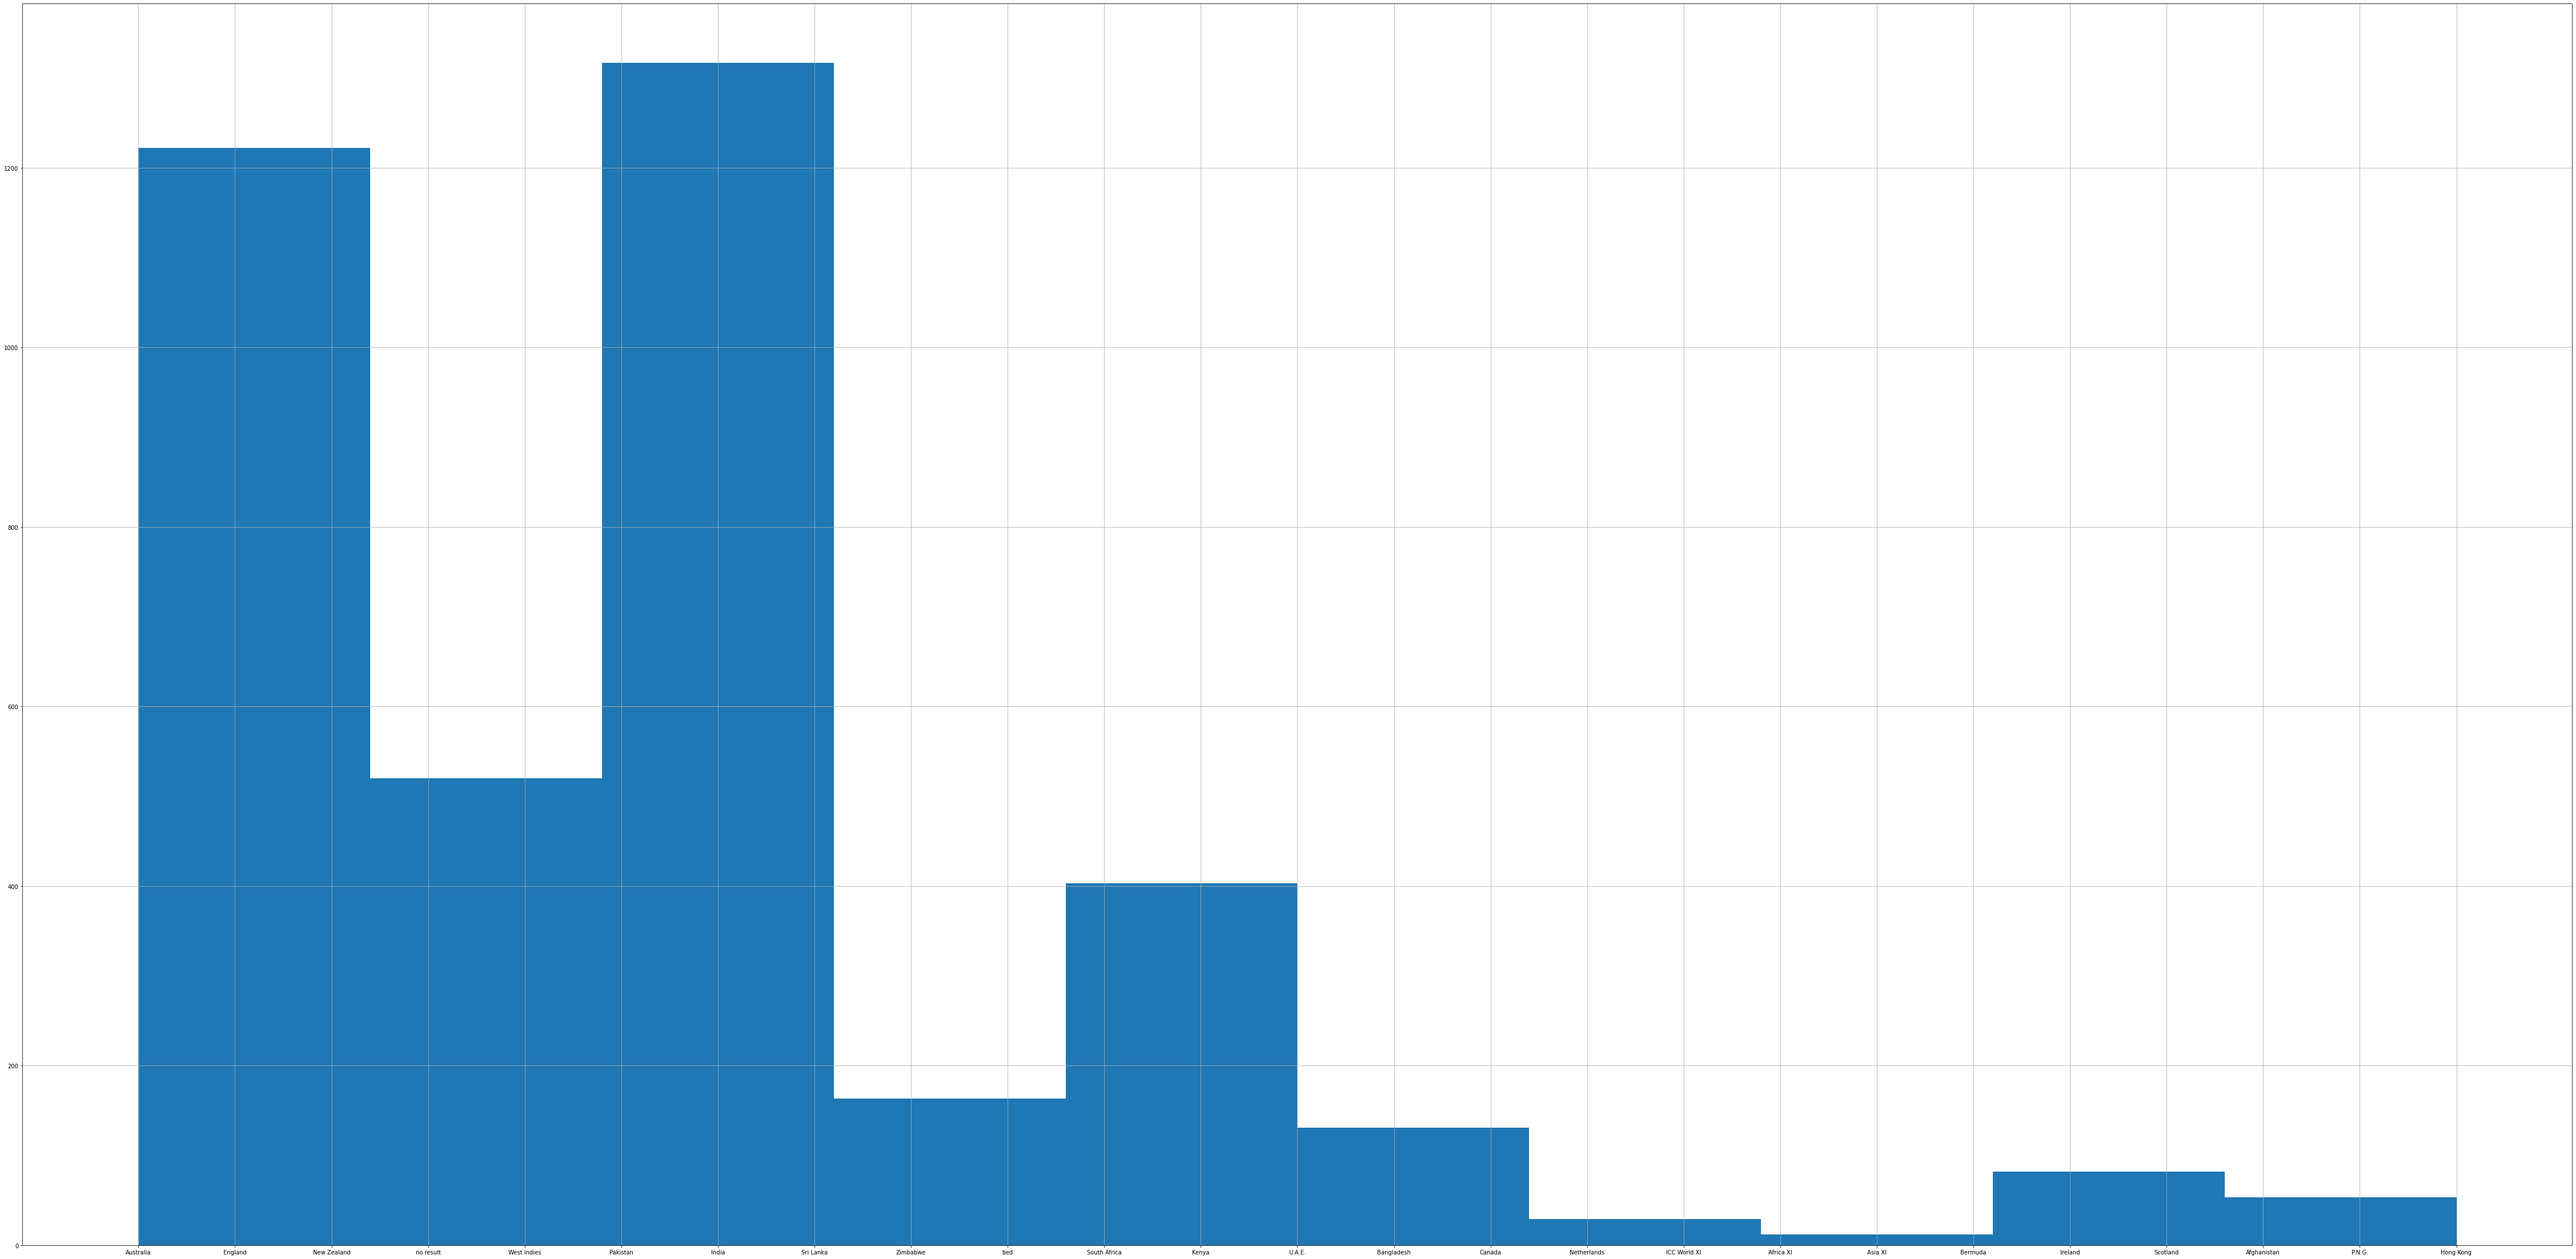

In [ ]:
df_odi_stats['Winner'].hist(figsize=(80,40))

In [ ]:
indian_ground = ['Greater Noida','Dharamsala','Ranchi','Vijayawada','Jodhpur',
                 'Mohali','Patna','Mumbai (BS)','Lucknow','Visakhapatnam',
                 'Kolkata', 'Chennai', 'Faridabad', 'Gwalior','Rajkot', 'Kanpur', 
                 'Mumbai','Nagpur', 'Chandigarh','Thiruvananthapuram','Pune', 
                 'Ahmedabad', 'Jalandhar', 'Cuttack','Amritsar','Delhi', 'Bengaluru',  
                 'Hyderabad (Deccan)', 'Jaipur', 'Srinagar', 'Vadodara', 'Indore',
                 'Jamshedpur','Guwahati', 'Moratuwa', 'Sharjah', 'Kingston', 'New Delhi']

In [ ]:
ground = indian_ground

In [ ]:
Indian_Ground=pd.DataFrame(indian_ground)
Indian_Ground.columns= ['GROUNDS']
Indian_Ground

,GROUNDS
0,Greater Noida
1,Dharamsala
2,Ranchi
3,Vijayawada
4,Jodhpur
5,Mohali
6,Patna
7,Mumbai (BS)
8,Lucknow
9,Visakhapatnam


In [ ]:
home_conditions = df_odi_stats.groupby(['Winner','Margin'])['Ground'].agg('sum') #cummulative
home_conditions = home_conditions.reset_index()  
home_conditions.sort_values(['Margin'], ascending=True)

,Winner,Margin,Ground
0,Afghanistan,1 run,Sharjah
553,New Zealand,1 run,SialkotSydneyPerthHobart
1081,West Indies,1 run,SydneyKingstonBridgetown
950,Sri Lanka,1 run,DambullaBulawayo
662,Pakistan,1 run,SharjahPort Elizabeth
...,...,...,...
482,India,99 runs,Nagpur
949,South Africa,99 runs,Port ElizabethCape Town
1190,West Indies,99 runs,Bridgetown
183,Australia,99 runs,SydneyChennaiSydney


In [ ]:
df_win_counts = pd.DataFrame(df_odi_stats['Winner'].value_counts())
df_win_counts.head(5)

,Winner
Australia,555
India,476
Pakistan,469
West Indies,380
Sri Lanka,372


In [ ]:
val_to_check = int(input('Enter the total No. of Runs: '))
get_confidence_interval = input('Enter confidence Interval in Percentage: ')

# Enter the total No. of Runs: 50
# Enter confidence Interval in Percentage: 95

Enter the total No. of Runs: 50
Enter confidence Interval in Percentage: 95


In [ ]:
df_win_counts['Winner'].mean()

157.28

In [ ]:
df_win_counts['Winner'].std()

185.81588557852996

In [ ]:
val_z_score = (val_to_check - df_win_counts['Winner'].mean())/df_win_counts['Winner'].std()
print(val_z_score)

-0.5773456863819163


In [ ]:
val_p_score = (st.norm.cdf(val_z_score) * 100)
print(val_p_score)

28.185297842945133


In [ ]:
if val_p_score < val_z_score:
  print("Alternate: India plays exceptionally well at home")

In [ ]:
if val_p_score > 50:
  actual_probability = 100-val_p_score
else:
  actual_probability = val_p_score

In [ ]:
if actual_probability < 50:
  print("Null: India's performance at home is not a rare thing")
else:
  print("Alternate: India plays exceptionally well at home")

Null: India's performance at home is not a rare thing


### **Analysis of Variance (ANOVA TEST)**

**THEORY:**
- It is a technique which checks if the means of two or more groups are significantly different from each other. 

- Analysis of Variance (ANOVA) checks the impact of one or more factors by comparing the means of different samples.

- ANOVA on each of the IPL franchise and figure it out if any of the franchise scores exceptionally high runs (batting team vs batsman scores) 

- Algorithm / Code Explaination:
  1. Get the data
  2. Display overall match statistics
  3. Plot the stats (boxplot)
  4. Print a stats model
  5. Mean
  6. Residual sum of Squares
  7. Doing F Statistics
  8. Residual Mean
  9. Scipy statistics
  10. ANOVA Table

**CODE:**

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as ols

In [ ]:
ipl_ball_by_ball = '/content/IPL Ball-by-Ball 2008-2020.csv'
df_ipl_ball_by_ball = pd.read_csv(ipl_ball_by_ball)

In [ ]:
all_matches_stats = pd.DataFrame(df_ipl_ball_by_ball.groupby(['id','batting_team']).batsman_runs.sum()).reset_index()
all_matches_stats

,id,batting_team,batsman_runs
0,335982,Kolkata Knight Riders,205
1,335982,Royal Challengers Bangalore,63
2,335983,Chennai Super Kings,234
3,335983,Kings XI Punjab,196
4,335984,Delhi Daredevils,122
...,...,...,...
1625,1237178,Sunrisers Hyderabad,122
1626,1237180,Delhi Capitals,181
1627,1237180,Sunrisers Hyderabad,166
1628,1237181,Delhi Capitals,152


In [ ]:
df_ipl_ball_by_ball.head(3)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
overall_matches_stats = all_matches_stats[['batsman_runs','batting_team']]
overall_matches_stats = overall_matches_stats.sort_values(['batting_team'])
overall_matches_stats

,batsman_runs,batting_team
851,183,Chennai Super Kings
641,183,Chennai Super Kings
244,161,Chennai Super Kings
639,216,Chennai Super Kings
887,151,Chennai Super Kings
...,...,...
708,151,Sunrisers Hyderabad
1319,124,Sunrisers Hyderabad
1171,147,Sunrisers Hyderabad
1531,115,Sunrisers Hyderabad


In [ ]:
overall_matches_stats.groupby('batting_team').mean().reset_index().sort_values(['batsman_runs'], ascending=False)

,batting_team,batsman_runs
4,Gujarat Lions,154.233333
2,Delhi Capitals,153.757576
0,Chennai Super Kings,151.421348
8,Mumbai Indians,150.477833
5,Kings XI Punjab,149.978947
14,Sunrisers Hyderabad,148.298387
11,Rising Pune Supergiant,148.125000
13,Royal Challengers Bangalore,147.389744
10,Rajasthan Royals,145.787500
1,Deccan Chargers,145.133333


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



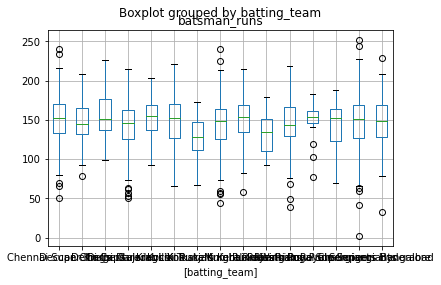

In [ ]:
overall_matches_stats.boxplot(by='batting_team')

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

lm = ols("batsman_runs ~ batting_team", data=overall_matches_stats).fit()
table = sm.stats.anova_lm(lm)
print(table)

                  df        sum_sq      mean_sq         F    PR(>F)
batting_team    14.0  2.958372e+04  2113.122993  2.241977  0.005194
Residual      1615.0  1.522180e+06   942.526581       NaN       NaN


In [ ]:
overall_mean = overall_matches_stats['batsman_runs'].mean()
sum_of_squares = sum( (overall_matches_stats['batsman_runs']-overall_mean)**2) 
sum_of_squares

1551764.1503067508

In [ ]:
overall_matches_stats.shape[0]

1630

In [ ]:
matches_mean_score = overall_matches_stats.groupby('batting_team').mean().reset_index()
matches_mean_score.columns = ['batting_team', 'Average_match_score']
matches_mean_score

,batting_team,Average_match_score
0,Chennai Super Kings,151.421348
1,Deccan Chargers,145.133333
2,Delhi Capitals,153.757576
3,Delhi Daredevils,142.925466
4,Gujarat Lions,154.233333
5,Kings XI Punjab,149.978947
6,Kochi Tuskers Kerala,125.571429
7,Kolkata Knight Riders,144.614583
8,Mumbai Indians,150.477833
9,Pune Warriors,134.222222


In [ ]:
all_matches_stats_final = overall_matches_stats.merge(matches_mean_score, how='inner', left_on='batting_team',right_on='batting_team')
residual_sum_of_squares = sum( ( all_matches_stats_final['batsman_runs']- all_matches_stats_final['Average_match_score'] )**2 )
residual_sum_of_squares

1522180.428407832

In [ ]:
overall_sum_of_square = residual_sum_of_squares + sum_of_squares
overall_sum_of_square

3073944.578714583

In [ ]:
match_wise_sum_of_square = overall_sum_of_square -  residual_sum_of_squares 
match_wise_sum_of_square

1551764.150306751

In [ ]:
sum ((overall_mean - all_matches_stats_final['Average_match_score']) **2 )

29583.721898922333

In [ ]:
mean_of_square_matches = match_wise_sum_of_square / 536
mean_of_square_residual = residual_sum_of_squares/ 11625
print(mean_of_square_matches)
print(mean_of_square_residual)

2895.082369975282
130.94025190605007


In [ ]:
df_matches = matches_mean_score.shape[0] - 1 
df_residual = overall_matches_stats.shape[0] - matches_mean_score.shape[0]
print(df_matches)
print(df_residual)

14
1615


In [ ]:
mean_of_square_matches = match_wise_sum_of_square / df_matches

mean_of_square_residual = residual_sum_of_squares/ df_residual
print(mean_of_square_matches)
print(mean_of_square_residual)

110840.29645048222
942.5265810574812


In [ ]:
f_stats = mean_of_square_matches/mean_of_square_residual
f_stats

117.59911993794738

In [ ]:
import scipy.stats 
scipy.stats.f.cdf(f_stats,df_matches,df_residual)

0.9999999999999999

In [ ]:
import scipy.stats 
1- scipy.stats.f.cdf(f_stats,df_matches,df_residual)

1.1102230246251565e-16

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

lm = ols("batsman_runs ~ batting_team", data=overall_matches_stats).fit()
table = sm.stats.anova_lm(lm)
print(table)

                  df        sum_sq      mean_sq         F    PR(>F)
batting_team    14.0  2.958372e+04  2113.122993  2.241977  0.005194
Residual      1615.0  1.522180e+06   942.526581       NaN       NaN


### **Decision Tree Regressor**

**THEORY:**

- Decision tree is a flowchart or a tree like structure. It is a supervised learning algorithm

- Decision tree is a model of decisions and all of their possible results, including outcomes, input costs and utility.

- In Decision tree regressor it basically observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output.

- Continuous output means it is not represented just by a discrete.

- Algorithm / Code Explaination:
  1. Import the libraries
  2. Get the dataset and print it
  3. Fit decision tree regressor to the dataset
  4. Prediction of new value
  5. Training and Testing
  6. Again fitting decision tree regressor to the dataset
  7. Mean Squared Error
  8. Calculating the value

**CODE:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
csv_file = '/content/petrol_consumption.csv'
df_petrol = pd.read_csv(csv_file)

In [ ]:
df_petrol.head(3)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561


In [ ]:
df_new=pd.concat([df_petrol, df_petrol],axis=0)
df_new

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410
...,...,...,...,...,...
43,7.0,3745,2611,0.508,591
44,6.0,5215,2302,0.672,782
45,9.0,4476,3942,0.571,510
46,7.0,4296,4083,0.623,610


In [ ]:
df_x=df_petrol.drop('Petrol_Consumption', axis=1)
df_x
df_y = df_petrol['Petrol_Consumption']
df_y

0     541
1     524
2     561
3     414
4     410
5     457
6     344
7     467
8     464
9     498
10    580
11    471
12    525
13    508
14    566
15    635
16    603
17    714
18    865
19    640
20    649
21    540
22    464
23    547
24    460
25    566
26    577
27    631
28    574
29    534
30    571
31    554
32    577
33    628
34    487
35    644
36    640
37    704
38    648
39    968
40    587
41    699
42    632
43    591
44    782
45    510
46    610
47    524
Name: Petrol_Consumption, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
train_test_split(df_x, df_y, test_size=0.25)

[    Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)
 10         8.0            4391            5939                         0.530
 16         7.0            4206            8508                         0.572
 45         9.0            4476            3942                         0.571
 5         10.0            5342            1333                         0.571
 4          8.0            4399             431                         0.544
 11         7.5            5126           14186                         0.525
 30         7.0            3640            6905                         0.518
 17         7.0            3718            4725                         0.540
 20         7.0            4593            7834                         0.663
 3          7.5            4870            2351                         0.529
 8          8.0            4447            8577                         0.529
 14         7.0            4332            8159                 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.25)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
y_test

4     410
28    574
17    714
5     457
47    524
36    640
46    610
24    460
16    603
8     464
6     344
22    464
Name: Petrol_Consumption, dtype: int64

In [ ]:
df_prediction = pd.DataFrame({'Predicted_petrol_consumption': y_predict, 'Actual_Petrol_consumption': y_test})
df_prediction

,Predicted_petrol_consumption,Actual_Petrol_consumption
4,580.0,410
28,577.0,574
17,580.0,714
5,467.0,457
47,566.0,524
36,699.0,640
46,632.0,610
24,510.0,460
16,699.0,603
8,498.0,464


In [ ]:
from sklearn import metrics
metrics.mean_squared_error([1,2,3],[3,8,7])

18.666666666666668